In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = 'NY-House-Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000.0,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.0,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4800 non-null   float64
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4799 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [28]:
#### What is the total number of entries in the dataset?
#Ans: 4801
## Are there any columns with missing values?
#Ans: Yes (Price&Bath)
## What are the data types of different columns?
#Ans: COLUMNS, FLOAT, INT

In [26]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
BROKERTITLE                    0
TYPE                           0
PRICE                          1
BEDS                           0
BATH                           1
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [12]:
missing_values_mask = df.isnull().any(axis=1)
rows_with_missing_values = df[missing_values_mask]
print("Rows with Missing Values:")
rows_with_missing_values

Rows with Missing Values:


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000.0,2,NaN,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694
908,Brokered by Exp Realty,Multi-family home for sale,674999.0,5,NaN,2600.000000,1463 Longfellow Ave,"Bronx, NY 10460","1463 Longfellow AveBronx, NY 10460",United States,New York,Bronx County,The Bronx,Longfellow Avenue,"1463 Longfellow Ave, Bronx, NY 10460, USA",40.831556,-73.887227
1076,Brokered by Benjamin Realty Since 1980,Co-op for sale,NaN,1,1.0,2184.207862,6 Burns St Apt 111,"Forest Hills, NY 11375","6 Burns St Apt 111Forest Hills, NY 11375",New York,Queens County,Queens,Forest Hills,6,"6 Burns St Apt 111, Forest Hills, NY 11375, USA",40.719305,-73.845325


In [13]:
similarity_columns = ['BEDS', 'PRICE', 'LOCALITY', 'BROKERTITLE', 'TYPE']
missing_bathroom_row = df.loc[9]
similarity_values = missing_bathroom_row[similarity_columns]
similar_data = df[
 (df['BEDS'] == similarity_values['BEDS']) &
 (df['LOCALITY'] == similarity_values['LOCALITY']) &
 (df['PRICE'].between(similarity_values['PRICE'] - df['PRICE'].std(),
similarity_values['PRICE'] + df['PRICE'].std())) &
 (df['TYPE'] == similarity_values['TYPE'])]

In [14]:
print("Number of similar properties:", similar_data.shape[0])
mean_bathroom_value = similar_data['BATH'].mean()
print("Mean bathrooms value:", mean_bathroom_value)
df.loc[9, 'BATH'] = int(mean_bathroom_value) 
print("DataFrame with Imputed Values:")
df.loc[9]

Number of similar properties: 80
Mean bathrooms value: 1.2278481012658229
DataFrame with Imputed Values:


BROKERTITLE                                Brokered by CENTURY 21 MK Realty
TYPE                                                         Co-op for sale
PRICE                                                              440000.0
BEDS                                                                      2
BATH                                                                    1.0
PROPERTYSQFT                                                          978.0
ADDRESS                                              1350 Ocean Pkwy Apt 5G
STATE                                                    Brooklyn, NY 11230
MAIN_ADDRESS                       1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230
ADMINISTRATIVE_AREA_LEVEL_2                                        New York
LOCALITY                                                       Kings County
SUBLOCALITY                                                        Brooklyn
STREET_NAME                                                         Midwood
LONG_NAME   

In [31]:
## TASK 1 Continuing Imputation

In [32]:
similarity_columns_908 = ['BEDS', 'PRICE', 'LOCALITY', 'BROKERTITLE', 'TYPE']
missing_bathroom_row_908 = df.loc[908]
similarity_values_908 = missing_bathroom_row_908[similarity_columns_908]

In [33]:
similar_data_908 = df[
    (df['BEDS'] == similarity_values_908['BEDS']) &
    (df['LOCALITY'] == similarity_values_908['LOCALITY']) &
    (df['PRICE'].between(similarity_values_908['PRICE'] - df['PRICE'],
                         similarity_values_908['PRICE'] + df['PRICE'])) &
    (df['TYPE'] == similarity_values_908['TYPE'])
]

In [34]:
print(f"Number of similar properties found for row 908: {similar_data_908.shape[0]}")

Number of similar properties found for row 908: 126


In [37]:
mean_bathroom_value_908 = similar_data_908['BATH'].mean()
print(f"Mean bathrooms value: {mean_bathroom_value_908}")

Mean bathrooms value: 2.904972660591243


In [38]:
df.loc[908, 'BATH'] = round(mean_bathroom_value_908)
print("DataFrame with Imputed Values:")
df.loc[908]

DataFrame with Imputed Values:


BROKERTITLE                                       Brokered by Exp Realty
TYPE                                          Multi-family home for sale
PRICE                                                           674999.0
BEDS                                                                   5
BATH                                                                 3.0
PROPERTYSQFT                                                      2600.0
ADDRESS                                              1463 Longfellow Ave
STATE                                                    Bronx, NY 10460
MAIN_ADDRESS                          1463 Longfellow AveBronx, NY 10460
ADMINISTRATIVE_AREA_LEVEL_2                                United States
LOCALITY                                                        New York
SUBLOCALITY                                                 Bronx County
STREET_NAME                                                    The Bronx
LONG_NAME                                          

In [39]:
similarity_columns_1076 = ['BEDS', 'LOCALITY', 'TYPE', 'PROPERTYSQFT']
missing_price_row_1076 = df.loc[1076]
similarity_values_1076 = missing_price_row_1076[similarity_columns_1076]

In [40]:
similar_data_1076 = df[
    (df['BEDS'] == similarity_values_1076['BEDS']) &
    (df['LOCALITY'] == similarity_values_1076['LOCALITY']) &
    (df['TYPE'] == similarity_values_1076['TYPE']) &
    (df['PROPERTYSQFT'].between(similarity_values_1076['PROPERTYSQFT'] - df['PROPERTYSQFT'],
                               similarity_values_1076['PROPERTYSQFT'] + df['PROPERTYSQFT']))
]

In [41]:
print("Number of similar properties found for row 1076:", similar_data_1076.shape[0])

Number of similar properties found for row 1076: 110


In [42]:
mean_price_value_1076 = similar_data_1076['PRICE'].mean()
print(f"Mean 'PRICE' value for similar properties: {mean_price_value_1076}")

Mean 'PRICE' value for similar properties: 271365.50458715594


In [43]:
df.loc[1076, 'PRICE'] = round(mean_price_value_1076)
print("DataFrame with Imputed Values:")
df.loc[1076]

DataFrame with Imputed Values:


BROKERTITLE                             Brokered by Benjamin Realty Since 1980
TYPE                                                            Co-op for sale
PRICE                                                                 271366.0
BEDS                                                                         1
BATH                                                                       1.0
PROPERTYSQFT                                                       2184.207862
ADDRESS                                                     6 Burns St Apt 111
STATE                                                   Forest Hills, NY 11375
MAIN_ADDRESS                          6 Burns St Apt 111Forest Hills, NY 11375
ADMINISTRATIVE_AREA_LEVEL_2                                           New York
LOCALITY                                                         Queens County
SUBLOCALITY                                                             Queens
STREET_NAME                                         

In [ ]:
####What else can you consider for these imputations?

##The number of bathrooms (BATH) likely has a stronger correlation with the property size (PROPERTYSQFT) than with the price, so it makes more sense to use property size for imputing missing values.

####Any other options to deal with the missing values?

##Yes, we can also choose to drop the rows with missing data since there are only three out of a thousand. Removing them would not significantly affect the overall analysis.

In [44]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [15]:
print("Number of Unique Values in Each Column:")
print(df.nunique())

Number of Unique Values in Each Column:
BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64


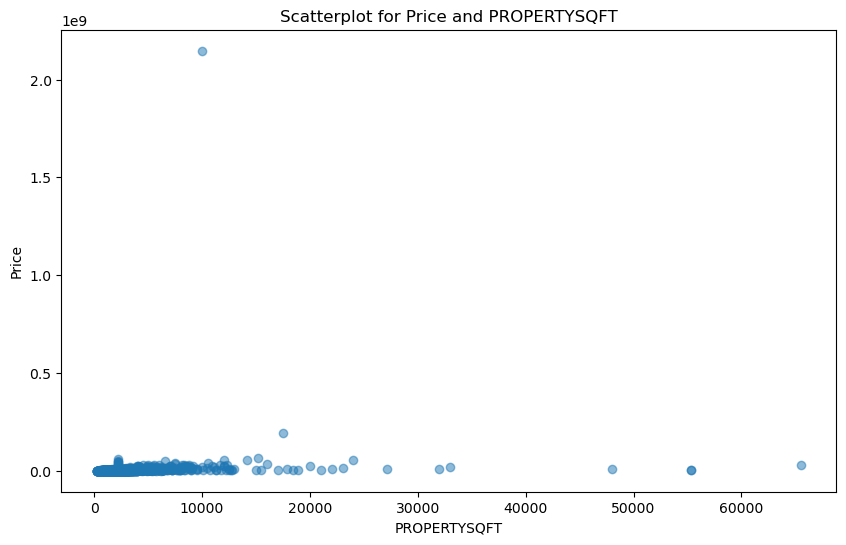

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PROPERTYSQFT'], df['PRICE'], alpha=0.5) 
plt.title('Scatterplot for Price and PROPERTYSQFT')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('Price')
plt.show() 

In [ ]:
#### QUESTION FROM PDF STEP 7

In [ ]:
####What observations can you make from the scatterplot?

##The first noticeable aspect is that most data points are clustered in the bottom-left corner of the plot. A few outliers stand out — one with an extremely high price and others with exceptionally large property sizes, positioned far to the right on the PROPERTYSQFT axis.

####Do you notice any patterns or trends in the data points?

##There doesn’t appear to be any clear or consistent pattern visible in the scatterplot, making it difficult to draw meaningful conclusions from this visualization.

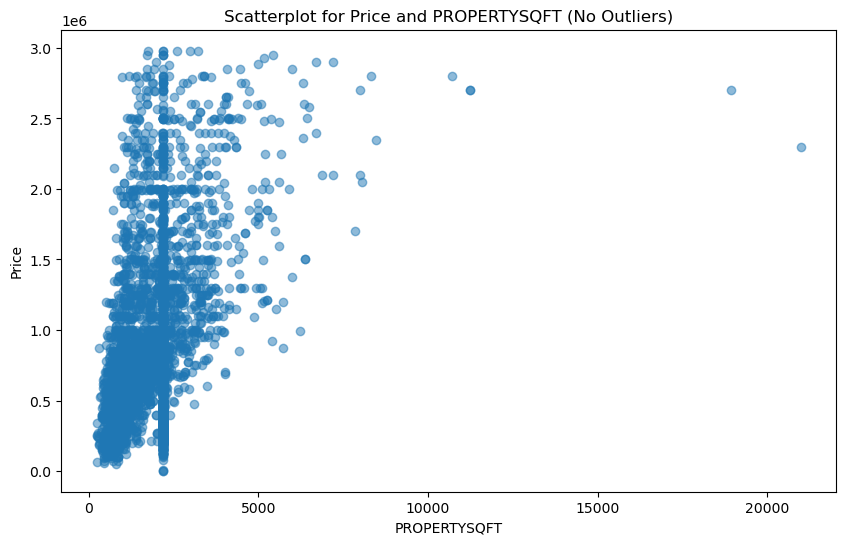

In [17]:

Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[df['PRICE'] <= upper_bound]
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['PROPERTYSQFT'], df_no_outliers['PRICE'], alpha=0.5)
plt.title('Scatterplot for Price and PROPERTYSQFT (No Outliers)')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('Price')
plt.show()

In [ ]:
## TASK 2  Investigating Anomaly

In [45]:
sqft_counts = df_no_outliers['PROPERTYSQFT'].value_counts()

In [46]:
print(sqft_counts.head(10).to_markdown(numalign="left", stralign="left", headers=["Square Ft Value", "Count"]))

| Square Ft Value   | Count   |
|:------------------|:--------|
| 2184.21           | 1476    |
| 800               | 57      |
| 750               | 53      |
| 900               | 53      |
| 1200              | 50      |
| 850               | 42      |
| 1100              | 41      |
| 1000              | 40      |
| 2000              | 30      |
| 1800              | 29      |


In [47]:
#### value of 2184.21 appears 1,477 times, cause of the thick vertical line.



In [48]:
price_counts = df_no_outliers['PRICE'].value_counts()

In [49]:
print(price_counts.head(10).to_markdown(numalign="left", stralign="left", headers=["Price Value", "Count"]))

| Price Value   | Count   |
|:--------------|:--------|
| 699000        | 53      |
| 799000        | 48      |
| 599000        | 47      |
| 1.25e+06      | 42      |
| 499000        | 42      |
| 999000        | 40      |
| 750000        | 37      |
| 899000        | 36      |
| 399000        | 34      |
| 650000        | 34      |


In [50]:
#### Prices like 699,000 799,000, and 599,000 are extremely common, All these common prices form a horizontal line on the plot as it is shared by numerous properties of various sizes in their square feet.

In [71]:
mean_prices_by_sublocality = df.groupby('LOCALITY')['PRICE'].mean().sort_values()

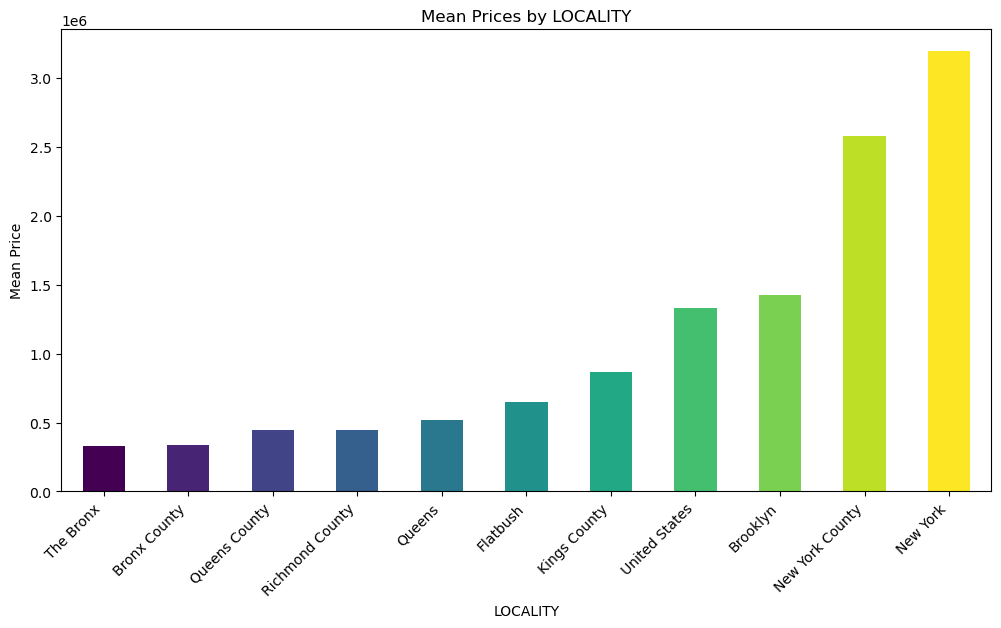

In [72]:
plt.figure(figsize=(12, 6))
n = len(mean_prices_by_sublocality)
colors = plt.cm.viridis(np.linspace(0, 1, n))
mean_prices_by_sublocality.plot(kind='bar', color=colors)
plt.title('Mean Prices by LOCALITY')
plt.xlabel('LOCALITY')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [51]:
### DISCUSSION

In [ ]:
### What could be causing the vertical line in the middle?
The vertical line is caused by 1,477 properties all sharing the exact same value: 2184.21

In [ ]:
#### Discussion Points: What insights can you gain from the mean prices by locality?
- Localities are the most expensive in the "NEW YORK COUNTY"
- Most affordable is in "THE BRONX"
- The Lighter the shade in the Bar Plot the more the Price of the Locality

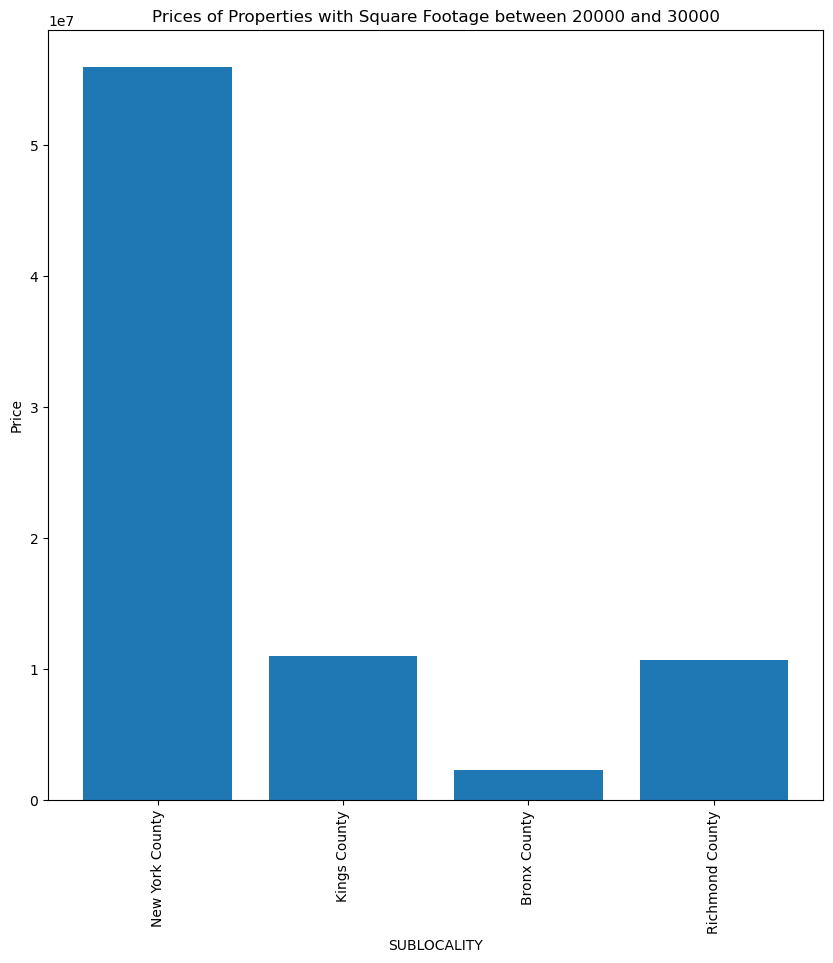

In [73]:
filtered_df = df.query('20000 < PROPERTYSQFT < 30000')
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.bar(x=filtered_df["SUBLOCALITY"], height=filtered_df["PRICE"])
plt.title('Prices of Properties with Square Footage between 20000 and 30000')
plt.xlabel('SUBLOCALITY')
plt.ylabel('Price')
plt.show()

In [ ]:
### TASK 3 Counting Big-Square Properties in Each Location

In [ ]:
#### Count the number of properties with square footage between 20,000 and 30,000 in each location/sublocality. 

In [55]:
min_sqft = 20000
max_sqft = 30000
filtered_df = df[(df['PROPERTYSQFT'] >= min_sqft) & (df['PROPERTYSQFT'] <= max_sqft)]

In [56]:
location_counts = filtered_df.groupby(['LOCALITY', 'SUBLOCALITY']).size().reset_index(name='PROPERTY_COUNT')

In [57]:
location_counts = location_counts.sort_values(by='PROPERTY_COUNT', ascending=False)
print("Count of properties by Location/Sublocality:")
print(location_counts.to_markdown(index=False, numalign="left", stralign="left"))

Count of properties by Location/Sublocality:
| LOCALITY   | SUBLOCALITY     | PROPERTY_COUNT   |
|:-----------|:----------------|:-----------------|
| New York   | New York County | 3                |
| New York   | Bronx County    | 1                |
| New York   | Kings County    | 1                |
| New York   | Richmond County | 1                |


In [ ]:
#### Generate a bar plot to illustrate the counts of big-square properties in different locations.

Text(0.5, 0, 'Location (Sublocality)')

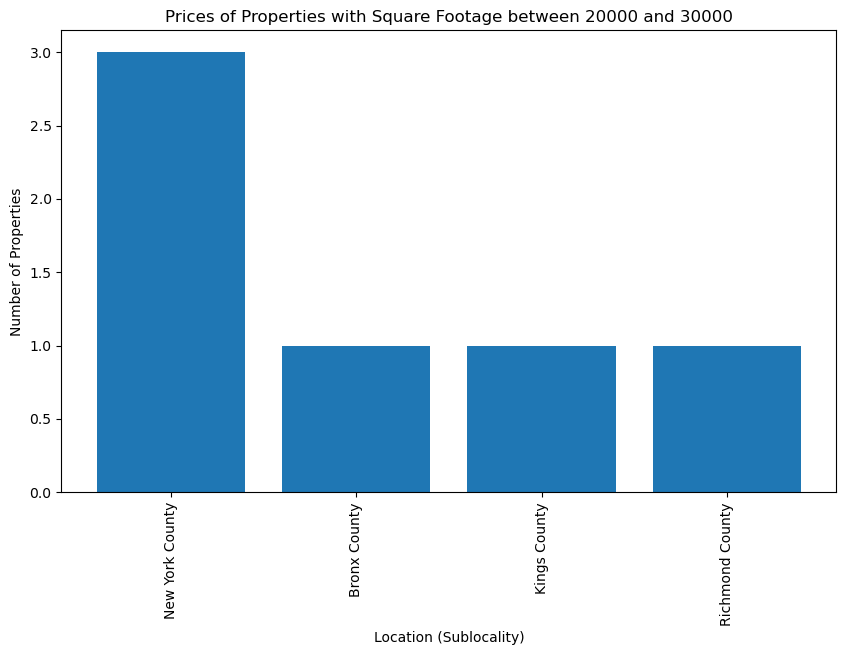

In [58]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(location_counts['SUBLOCALITY'], location_counts['PROPERTY_COUNT'])
plt.title('Prices of Properties with Square Footage between 20000 and 30000')
plt.ylabel('Number of Properties')
plt.xlabel('Location (Sublocality)')

In [ ]:
#### Are there specific areas with a higher concentration of such properties?
Yes, New York County has the highest concentration with 3 of these large properties.

In [ ]:
#### How does this information align with the earlier observations of size-price ratios?
- Earlier 'New York County' has the highest mean price of all localities.
-  Now I see that New York County also has the highest concentration of "big-square" properties (20,000-30,000 sq ft).

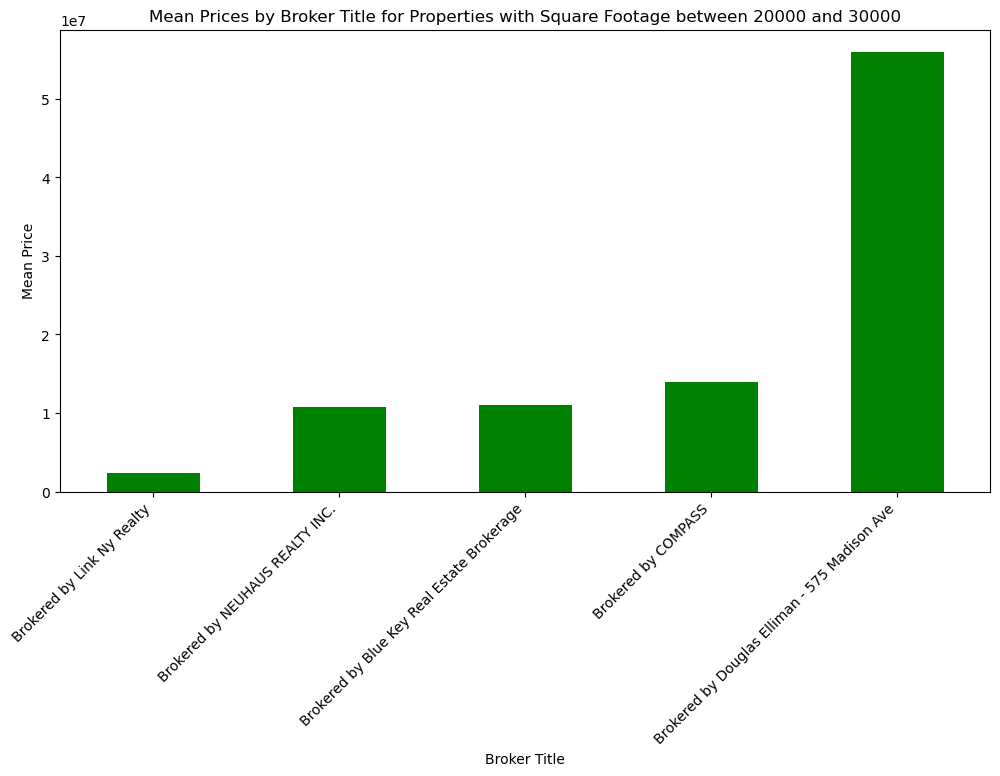

In [74]:
filtered_df = df.query('20000 < PROPERTYSQFT < 30000')
broker_prices = filtered_df.groupby('BROKERTITLE')['PRICE'].mean().sort_values()
plt.figure(figsize=(12, 6))
broker_prices.plot(kind='bar', color='green')
plt.title('Mean Prices by Broker Title for Properties with Square Footage between 20000 and 30000')
plt.xlabel('Broker Title')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

In [ ]:
### Task 4 Dominant Companies in Property Sales

In [ ]:
#### Your task is to explore and identify companies that dominate in selling the cheapest properties. Count how many properties they sell.

In [59]:
Q1_price = df['PRICE'].quantile(0.25)
print('The Q1 Price (25th percentile) is:', Q1_price)

The Q1 Price (25th percentile) is: 499000.0


In [60]:
cheapest_properties_df = df[df['PRICE'] <= Q1_price]
print(f"Found {cheapest_properties_df.shape[0]} properties in this 'cheapest' segment.")

Found 1236 properties in this 'cheapest' segment.


In [61]:
company_counts = cheapest_properties_df['BROKERTITLE'].value_counts()

In [62]:
print(company_counts.head(10).to_markdown( headers=["Company (BROKERTITLE)", "Count of Listings"]))

| Company (BROKERTITLE)                          |   Count of Listings |
|:-----------------------------------------------|--------------------:|
| Brokered by COMPASS                            |                  76 |
| Brokered by Sowae Corp                         |                  34 |
| Brokered by Brown Harris Stevens               |                  26 |
| Brokered by EXP Realty                         |                  24 |
| Brokered by RE MAX Edge                        |                  22 |
| Brokered by Winzone Realty Inc                 |                  22 |
| Brokered by Re/Max In The City                 |                  16 |
| Brokered by KELLER WILLIAMS REALTY LANDMARK II |                  16 |
| Brokered by Exp Realty                         |                  14 |
| Brokered by Keller Williams NYC                |                  13 |


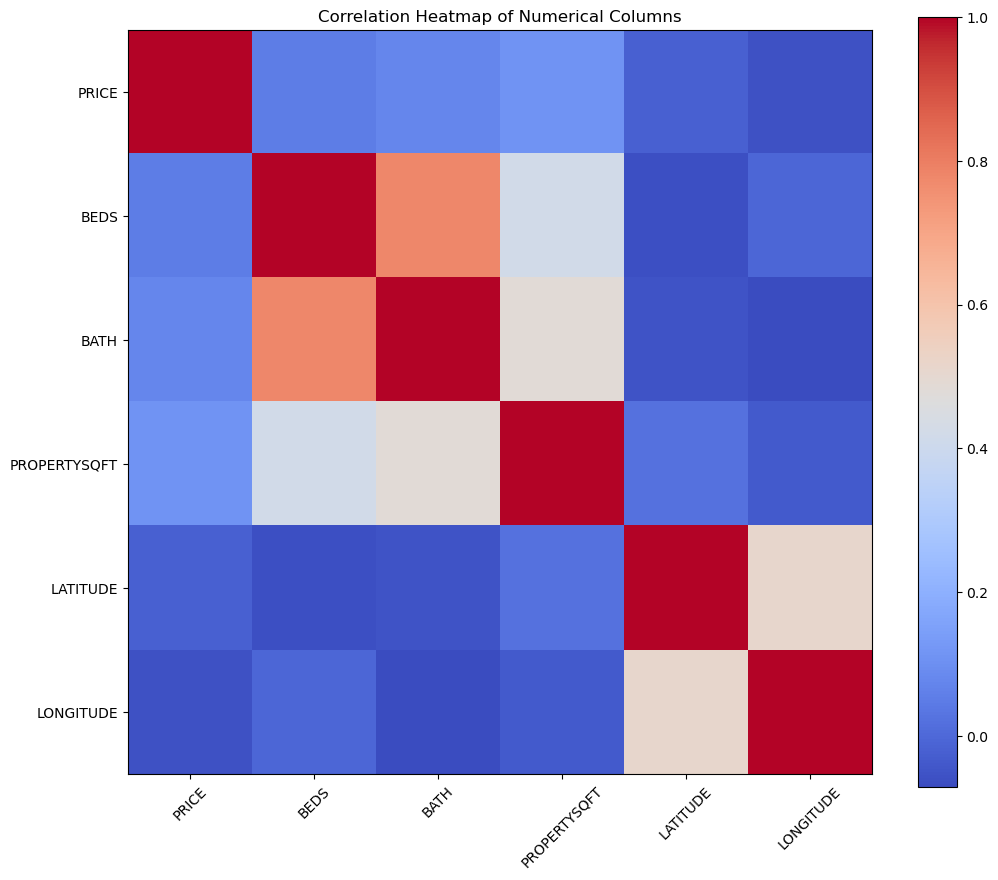

In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show() 

In [ ]:
####Observe the apparent correlation between the number of rooms and beds, as well as the less pronounced correlation between the number of rooms and square footage.
-Larger properties with more bedrooms (BEDS) also tend to have more bathrooms (BATH), showing a positive relationship between the two variables.
-The correlation between the number of rooms and property size (PROPERTYSQFT) appears weak, likely because the PROPERTYSQFT data contains inconsistencies or errors.

In [ ]:
####Why don't we observe a correlation between price and other features?

- As noted in Task 2, the dataset is significantly affected by the placeholder value 2184.21 in the PROPERTYSQFT column, which distorts the relationships between variables.

- Additionally, as observed in Step 9, LOCALITY has a major influence on price for instance, even a small one-bedroom property in an expensive area like New York County can have a much higher price than a larger property elsewhere.

In [ ]:
####Discussion Points:

○ What insights can be drawn from the observed correlations?

- BEDS and BATH show a strong positive correlation, while PROPERTYSQFT has a weak one due to data inconsistencies.

○ Why might there be a lack of correlation between price and certain features?

- The dataset is polluted, mainly by incorrect or placeholder values.

○ How could encoding the location feature provide additional insights?

- Encoding LOCALITY helps reduce the confounding effect of location on price.

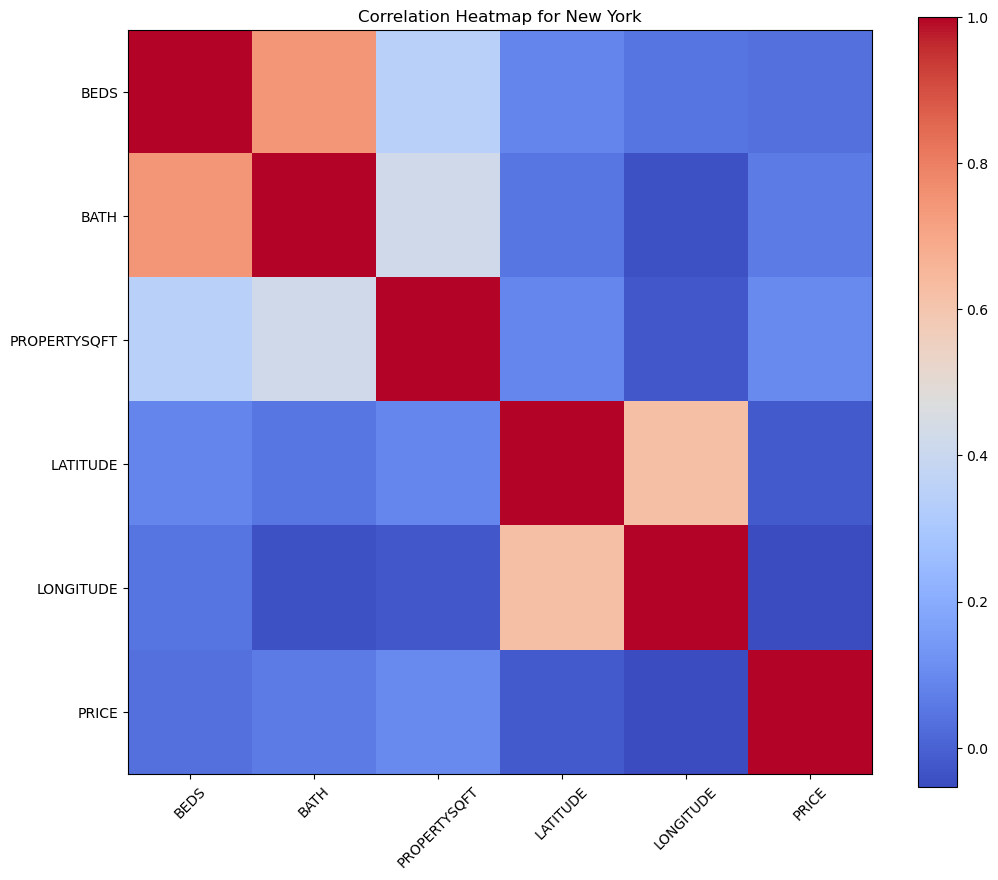

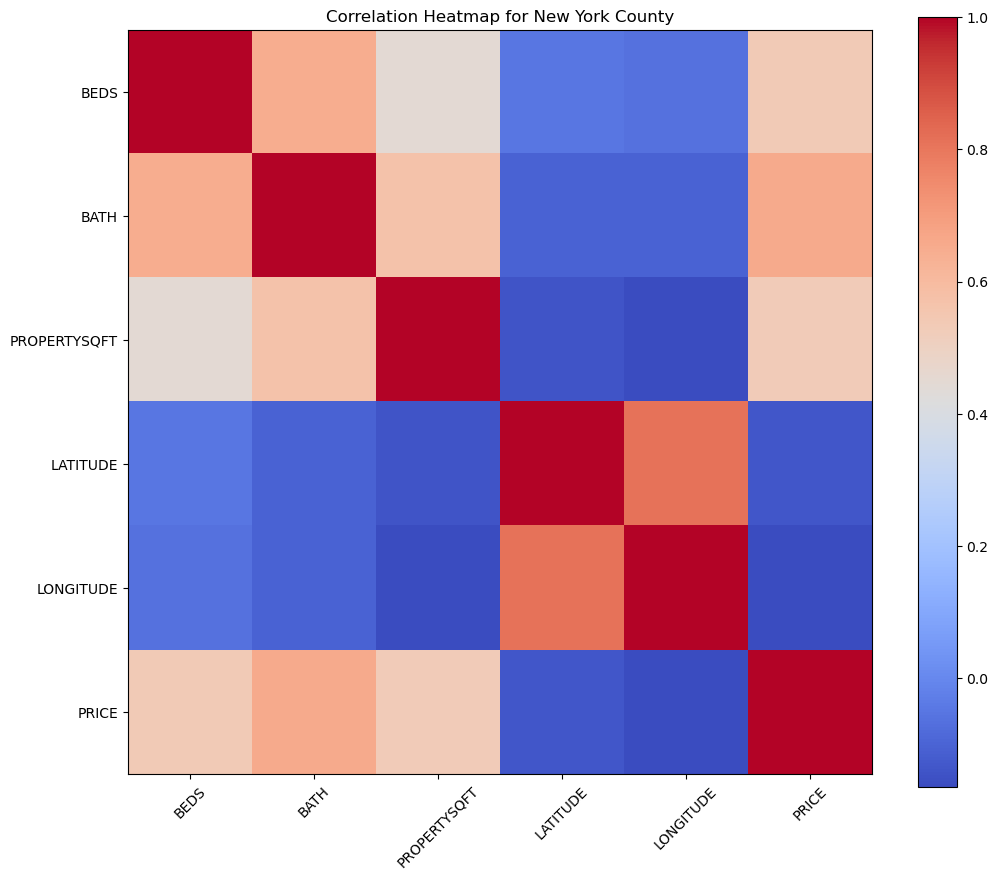

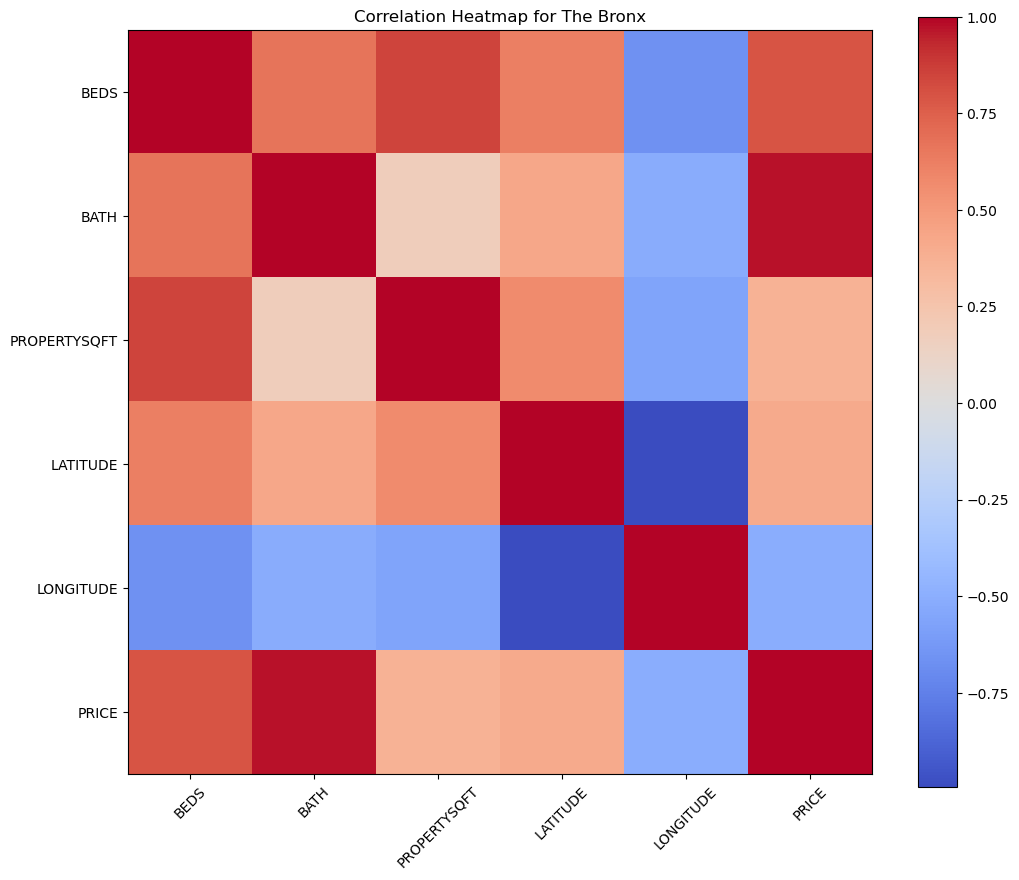

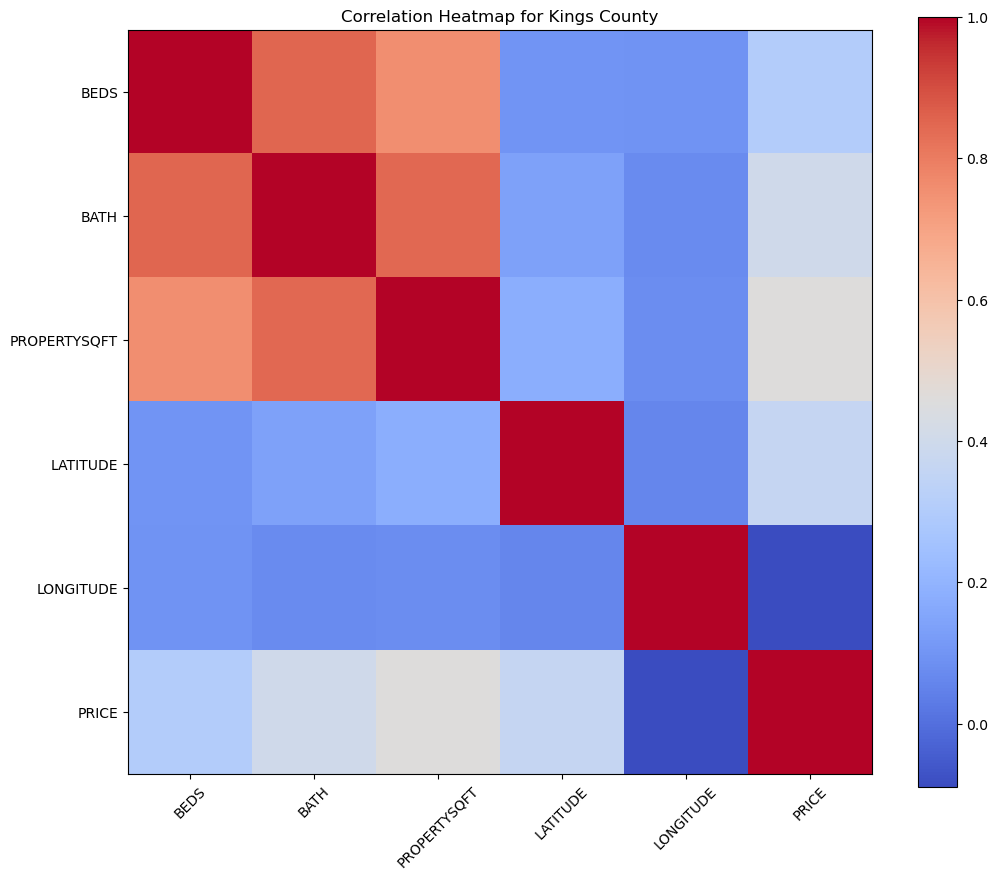

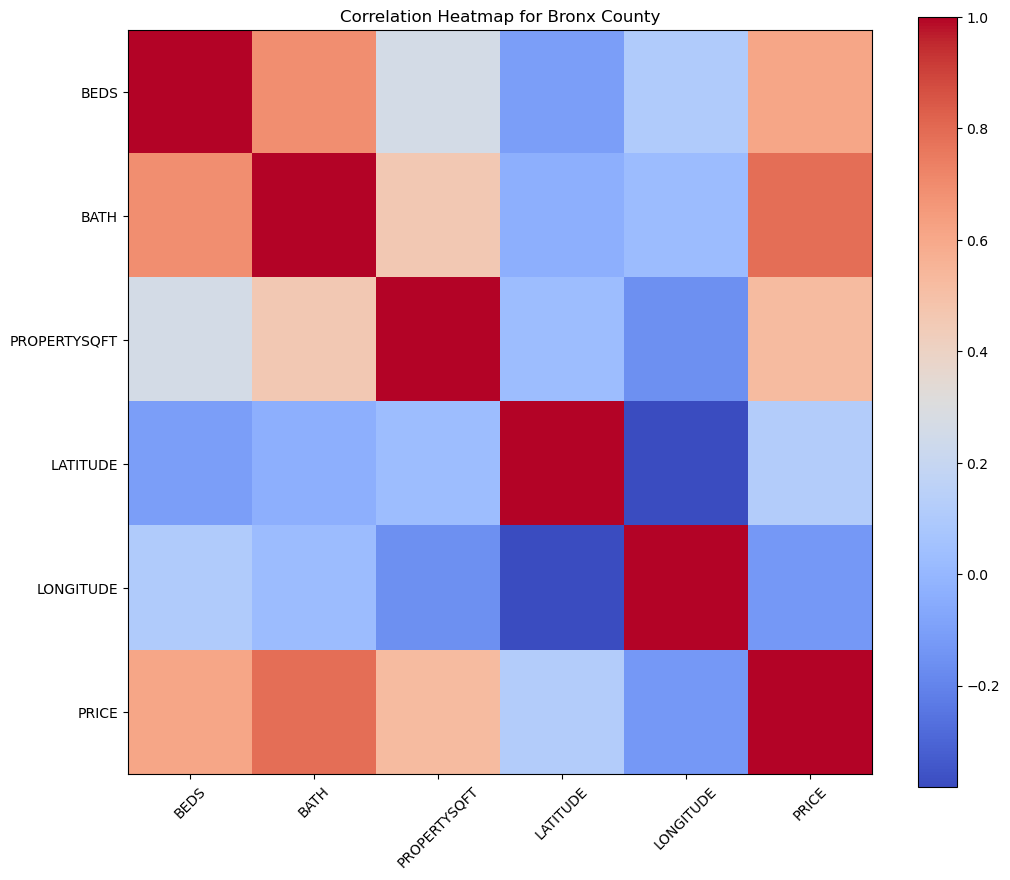

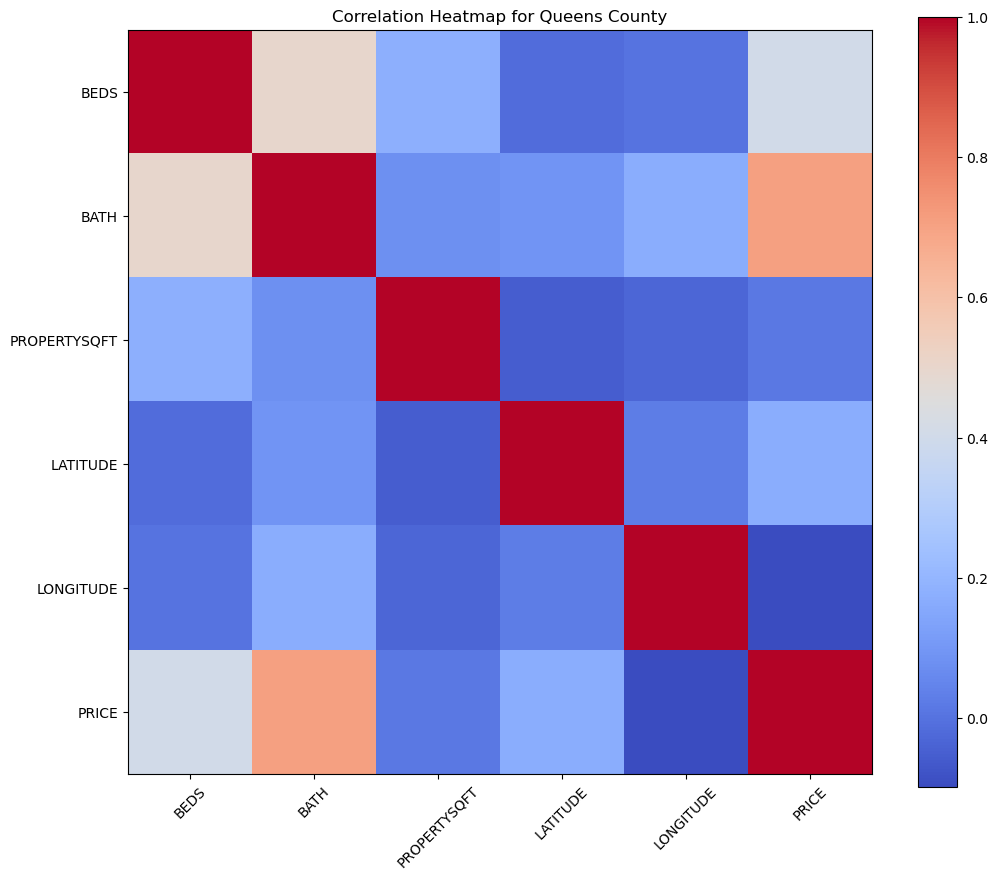

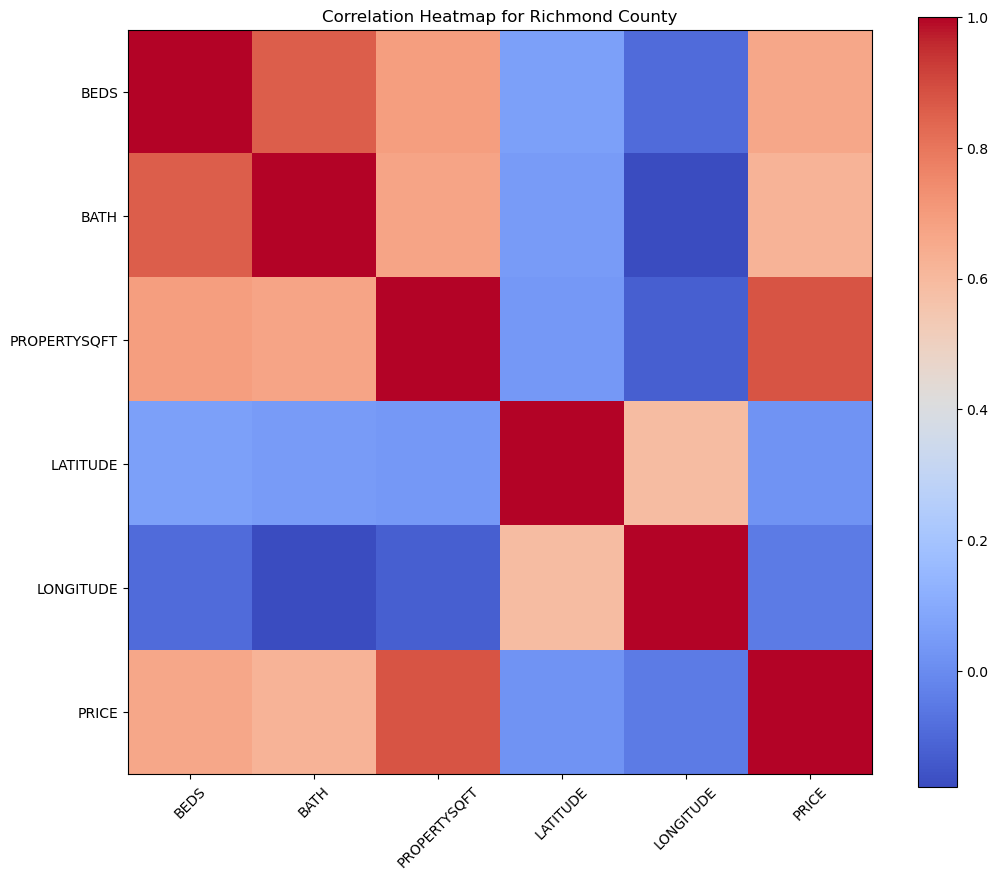

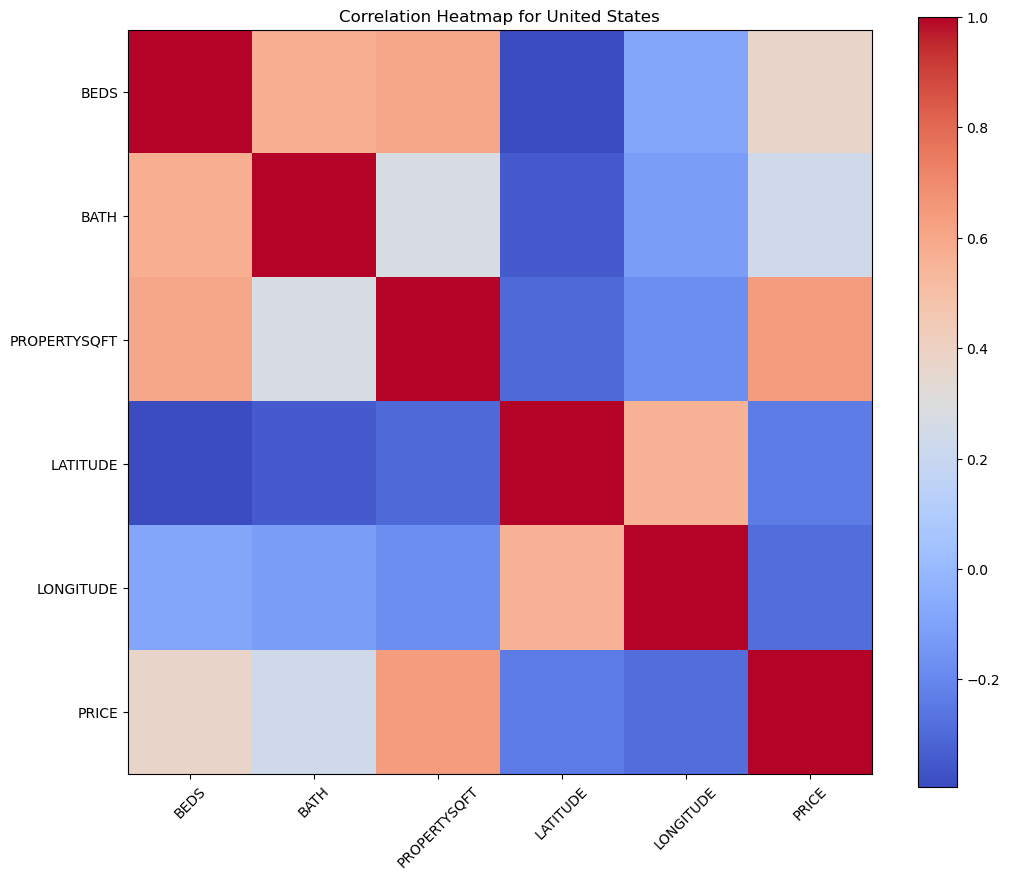

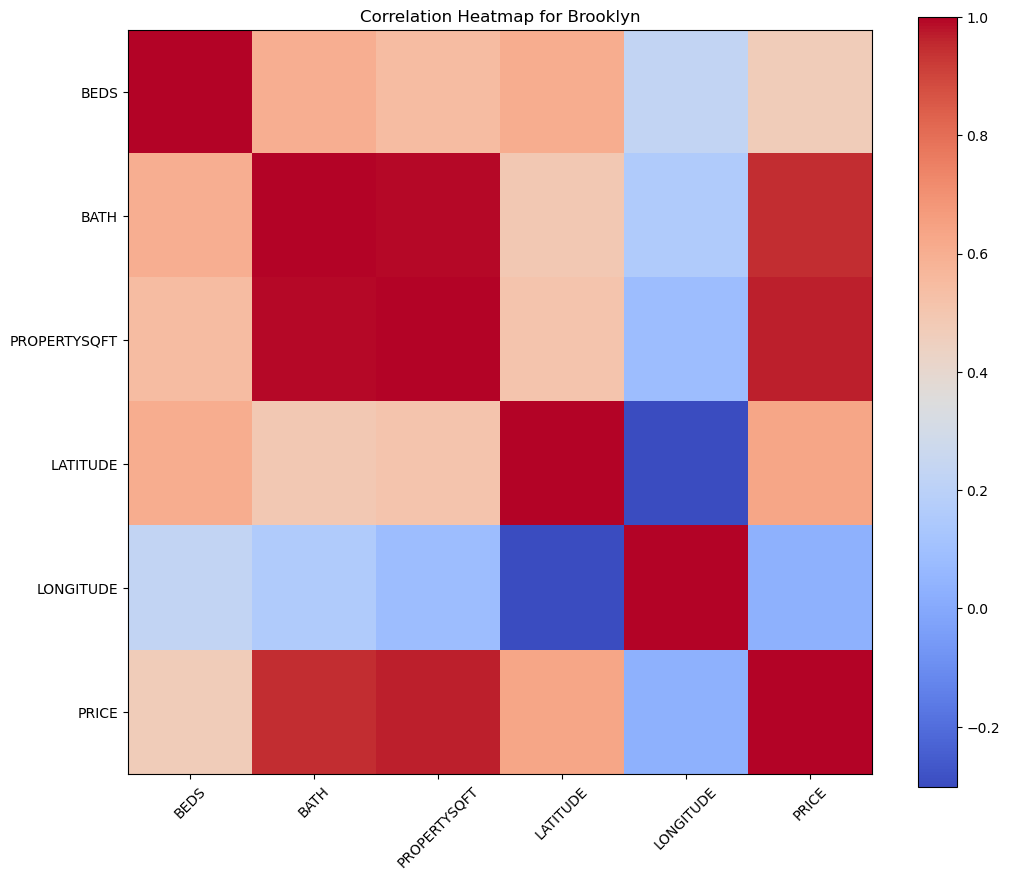

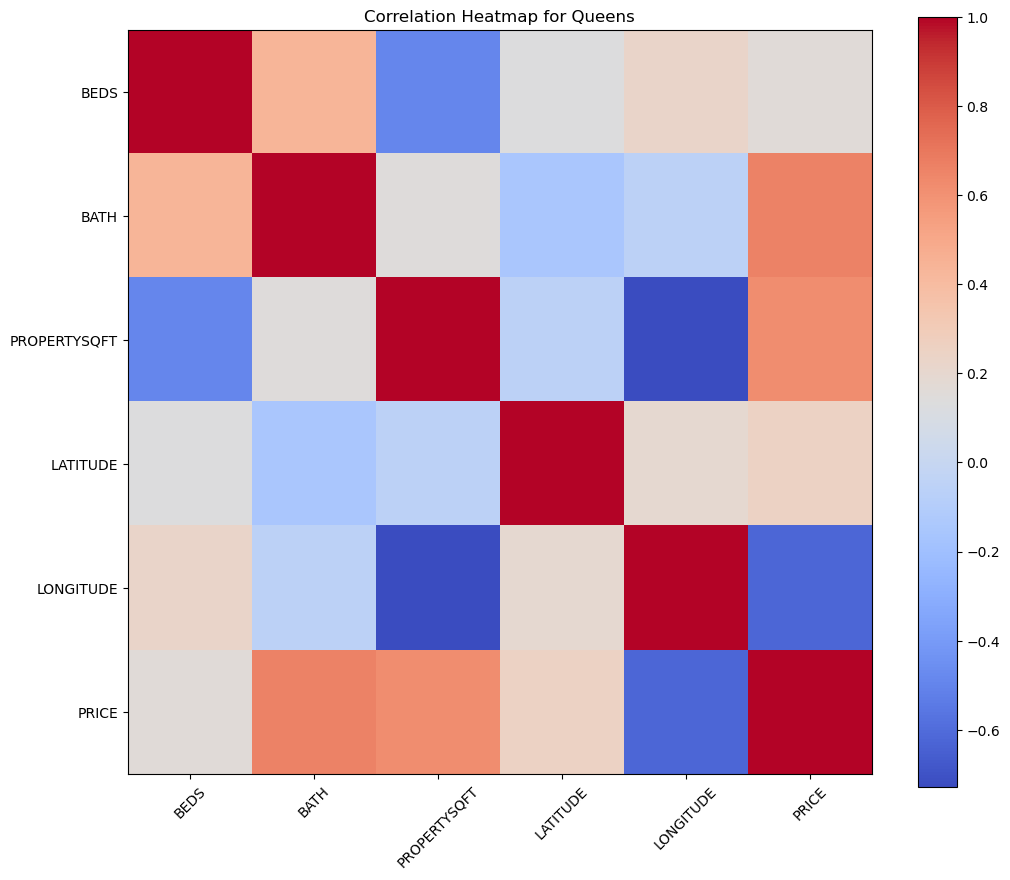

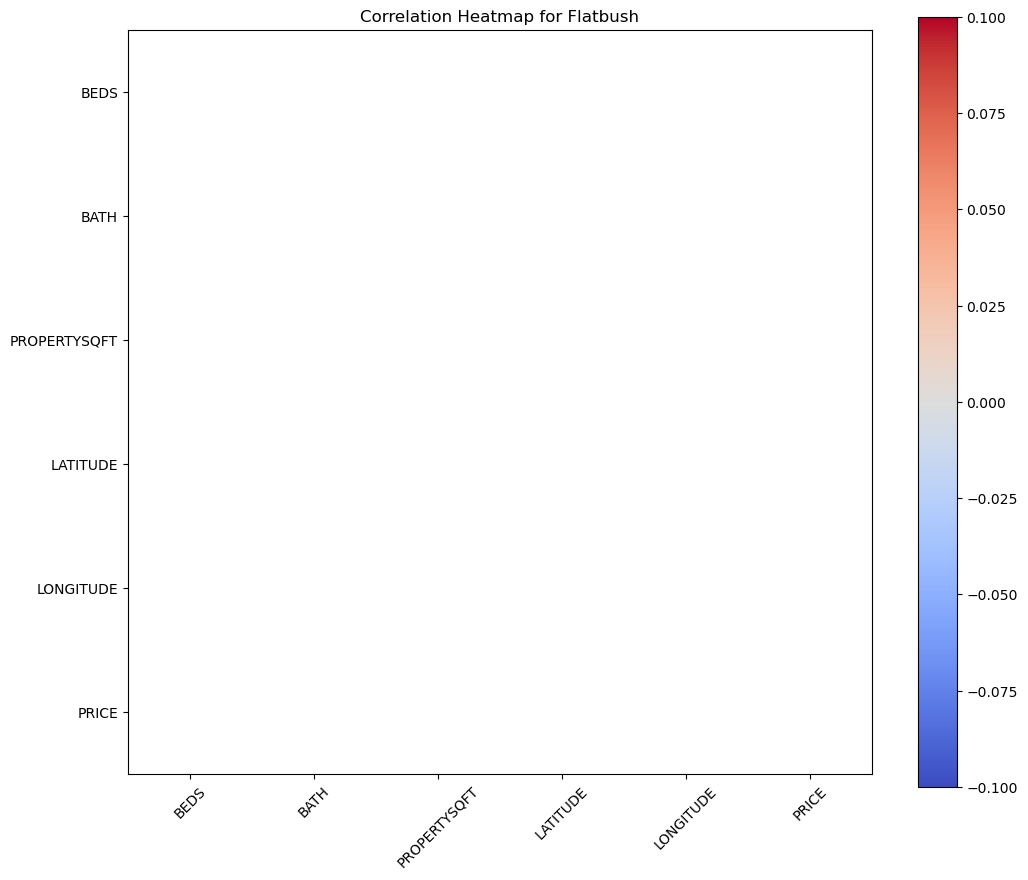

In [22]:
selected_columns = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'PRICE', 'LOCALITY']
selected_data = df[selected_columns]
unique_localities = df['LOCALITY'].unique()
for locality in unique_localities:
 locality_data = selected_data[selected_data['LOCALITY'] == locality]
 numeric_locality_data = locality_data.drop('LOCALITY', axis=1)
 correlation_matrix = numeric_locality_data.corr()
 plt.figure(figsize=(12, 10))
 plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
 plt.colorbar()
 plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
 plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
 plt.title(f'Correlation Heatmap for {locality}')
 plt.show()

In [ ]:
####Task 5: Unraveling Price Correlations
- In Queens County, property prices appear to be influenced more by the number of bathrooms (and to a lesser extent, bedrooms) than by overall size.
- This suggests that the market may value property layout (e.g., 3-bed, 2-bath) over total square footage, or that the PROPERTYSQFT data for this area may be particularly unreliable.

In [ ]:
####Discussion Points:
○ What could be the reasons for the observed variations in price correlations across different regions?
- Different regions prioritize property features differently based on local preferences and market conditions.
- Overall, price tends to correlate strongly with square footage, but this relationship varies by locality.
○ How might other features play a role in influencing property prices in specific areas?
- In Queens County, PROPERTYSQFT showed almost no correlation with PRICE, while BATH had a strong positive correlation.
- In The Bronx, PRICE also correlated closely with the number of BATH.
- In Brooklyn, LATITUDE showed a strong correlation with PRICE, suggesting that geographic position within the borough significantly affects property value.

In [23]:

money_you_have = 300_000
event_A = (df['BATH'] == 3) & (df['PRICE'] < money_you_have) & (df['LOCALITY'] == 'New York')
event_B = (df['PRICE'] < money_you_have) & (df['LOCALITY'] == 'New York')
conditional_probability = (event_A.sum() / event_B.sum())
print(f"Conditional Probability: {conditional_probability:.4f}")

Conditional Probability: 0.0196


In [ ]:
#### Additional Task  Varying Budget Scenario what if you have $3,000,000?

In [63]:
money_you_have = 3_000_000
num_event_A = (df['BATH'] == 3) & (df['PRICE'] < money_you_have) & (df['LOCALITY'] == 'New York')
num_event_B = (df['PRICE'] < money_you_have) & (df['LOCALITY'] == 'New York')

In [64]:
conditional_probability = (num_event_A.sum() / num_event_B.sum())
print(f"Conditional Probability: {conditional_probability:.4f}")

Conditional Probability: 0.1602


In [ ]:
#### TASK 6: Find the probabilities of having a bathroom for every bedroom (number of bathrooms >= number of rooms) outside of New York and inside it

In [65]:
##### INSIDE NEW YORK

In [66]:
df_inside_ny = df[df['LOCALITY'] == 'New York']
total_properties_inside_ny = len(df_inside_ny)

In [67]:
event_occurs_inside = (df_inside_ny['BATH'] >= df_inside_ny['BEDS'])
num_event_occurs_inside = event_occurs_inside.sum()
probability_inside = num_event_occurs_inside / total_properties_inside_ny
print(f"Probability = {probability_inside:.4f}")

Probability = 0.2387


In [68]:
##### OUTISDE NEW YORK

In [69]:
df_outside_ny = df[df['LOCALITY'] != 'New York']
total_properties_outside_ny = len(df_outside_ny)

In [70]:
event_occurs_outside = (df_outside_ny['BATH'] >= df_outside_ny['BEDS'])
num_event_occurs_outside = event_occurs_outside.sum()
probability_outside = num_event_occurs_outside / total_properties_outside_ny
print(f"Probability = {probability_outside:.4f}")

Probability = 0.5976
